<a href="https://colab.research.google.com/github/AasthaGoyalgit/AasthaGoyalgit/blob/main/NFT_Customer_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : NFT Customer Retention 


## Reading Files into Python

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/NFT DATA FINAL.csv')

In [ ]:
#first 5 instances using "head()" function
data.head()

,Form_Number,Age,Gender,No.of dependents,Occupation,City,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,Amount invested till date(in $),Amount invested till date,Earnings till date(NFT),Retained,last_transaction
0,1,66,Male,0.0,self_employed,187.0,2,1458.71,109403.25,1458.71,291742,3.00,0.20,3.00,17388.84,0,21-05-2019
1,2,35,Male,0.0,self_employed,NaN,2,5390.37,404277.75,7799.26,1559852,1508.40,100.56,1508.40,149032.92,0,01-11-2019
2,4,31,Male,0.0,salaried,146.0,2,3913.16,293487.00,4910.17,982034,3888.45,259.23,3888.45,33791.28,0,NaT
3,5,90,NaN,NaN,self_employed,1020.0,2,2291.91,171893.25,2084.54,416908,32149.95,2143.33,32149.95,12078.48,1,06-08-2019
4,6,42,Male,2.0,self_employed,1494.0,3,927.72,69579.00,1643.31,328662,23070.90,1538.06,23070.90,22453.44,1,03-11-2019


In [ ]:
#last 5 instances using "tail()" function
data.tail()

,Form_Number,Age,Gender,No.of dependents,Occupation,City,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,Amount invested till date(in $),Amount invested till date,Earnings till date(NFT),Retained,last_transaction
2736,2916,42,Female,0.0,self_employed,621.0,2,20558.22,1541866.50,19607.81,3921562,2.85,0.19,2.85,24087.0,0,18-12-2019
2737,2917,48,Male,0.0,self_employed,1205.0,3,1355.83,101687.25,5970.17,1194034,5627.10,375.14,5627.10,6656.0,1,18-10-2019
2738,2919,40,Female,0.0,self_employed,409.0,3,5002.54,375190.50,3335.65,667130,178.50,11.90,178.50,3004.0,0,21-11-2019
2739,2920,58,Female,0.0,self_employed,977.0,2,10272.09,770406.75,10616.81,2123362,11731.95,782.13,11731.95,9113.0,1,08-08-2019
2740,2921,66,Female,0.0,retired,334.0,2,4540.76,340557.00,4414.70,882940,23401.35,1560.09,23401.35,4033.0,0,13-12-2019


In [ ]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(2741, 17)

In [ ]:
#Printing all the columns present in data
data.columns

Index(['Form_Number', 'Age', 'Gender', 'No.of dependents', 'Occupation',
       'City', 'Education(1-ungraduate, 2-graduate,3-postgraduate)',
       'Personal Income(in $)', 'Personal Income', 'Family Income(in $)',
       'Family Income', 'Amount invested In last 6 months',
       'Amount invested till date(in $)', 'Amount invested till date',
       'Earnings till date(NFT)', 'Retained', 'last_transaction'],
      dtype='object')

## Variable Identification and Typecasting

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


In [ ]:
# A closer look at the data types present in the data
data.dtypes

Form_Number                                             int64
Age                                                     int64
Gender                                                 object
No.of dependents                                      float64
Occupation                                             object
City                                                  float64
Education(1-ungraduate, 2-graduate,3-postgraduate)      int64
Personal Income(in $)                                 float64
Personal Income                                       float64
Family Income(in $)                                   float64
Family Income                                           int64
Amount invested In last 6 months                      float64
Amount invested till date(in $)                       float64
Amount invested till date                             float64
Earnings till date(NFT)                               float64
Retained                                                int64
last_tra

### Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Form_Number                                           int64
Age                                                   int64
Education(1-ungraduate, 2-graduate,3-postgraduate)    int64
Family Income                                         int64
Retained                                              int64
dtype: object

Summary:

*    **Form Number** are a unique number assigned to each customer. It has dataType as **Integer**.

*    **Age** are also numbers and hence we are okay with them as integers.
*    **Education and Family Income** has datatype as **Integer**.

*    **Retention** : 1 represents the retained and 0 represents not retained. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [ ]:
# converting retention to category
data['Retained'] = data['Retained'].astype('category')
data.dtypes[data.dtypes == 'int64']

Form_Number                                           int64
Age                                                   int64
Education(1-ungraduate, 2-graduate,3-postgraduate)    int64
Family Income                                         int64
dtype: object

### Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

No.of dependents                    float64
City                                float64
Personal Income(in $)               float64
Personal Income                     float64
Family Income(in $)                 float64
Amount invested In last 6 months    float64
Amount invested till date(in $)     float64
Amount invested till date           float64
Earnings till date(NFT)             float64
dtype: object

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to Integer type**

*    **City** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **Family Income, Personal Income, Amount invested till date** are best represented by the float variables.

In [ ]:
# converting "dependents" and "city" to their respective types
data['No.of dependents'] = data['No.of dependents'].astype('Int64')
data['City'] = data['City'].astype('category')

# checking
data[['No.of dependents','City']].dtypes

No.of dependents       Int64
City                category
dtype: object

### Object Data Type

In [ ]:
data.dtypes

Form_Number                                              int64
Age                                                      int64
Gender                                                  object
No.of dependents                                         Int64
Occupation                                              object
City                                                  category
Education(1-ungraduate, 2-graduate,3-postgraduate)       int64
Personal Income(in $)                                  float64
Personal Income                                        float64
Family Income(in $)                                    float64
Family Income                                            int64
Amount invested In last 6 months                       float64
Amount invested till date(in $)                        float64
Amount invested till date                              float64
Earnings till date(NFT)                                float64
Retained                                              c

*    **variables like 'gender', 'occupation' and 'last_transaction' has object dataType**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [ ]:
# Manually checking object types
data[['Gender','Occupation','last_transaction']].head(7)

,Gender,Occupation,last_transaction
0,Male,self_employed,21-05-2019
1,Male,self_employed,01-11-2019
2,Male,salaried,NaT
3,NaN,self_employed,06-08-2019
4,Male,self_employed,03-11-2019
5,Female,self_employed,01-11-2019
6,Male,retired,24-09-2019


*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [ ]:
# typecasting "gender" and "occupation" to category type
data['Gender'] = data['Gender'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')

# checking
data[['Gender','Occupation']].dtypes

Gender        category
Occupation    category
dtype: object

### datetime Data Type

In [ ]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [ ]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [ ]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,21-05-2019,141.0,21.0,5.0,1.0
1,01-11-2019,11.0,2.0,1.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,06-08-2019,159.0,23.0,6.0,5.0
4,03-11-2019,70.0,11.0,3.0,0.0


The first column is the date of the last transaction which was done by any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

Form_Number                                              int64
Age                                                      int64
Gender                                                category
No.of dependents                                         Int64
Occupation                                            category
City                                                  category
Education(1-ungraduate, 2-graduate,3-postgraduate)       int64
Personal Income(in $)                                  float64
Personal Income                                        float64
Family Income(in $)                                    float64
Family Income                                            int64
Amount invested In last 6 months                       float64
Amount invested till date(in $)                        float64
Amount invested till date                              float64
Earnings till date(NFT)                                float64
Retained                                              c

## Univariate Analysis: Numerical Variables

In [ ]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

Form_Number                                             int64
Age                                                     int64
No.of dependents                                        Int64
Education(1-ungraduate, 2-graduate,3-postgraduate)      int64
Personal Income(in $)                                 float64
Personal Income                                       float64
Family Income(in $)                                   float64
Family Income                                           int64
Amount invested In last 6 months                      float64
Amount invested till date(in $)                       float64
Amount invested till date                             float64
Earnings till date(NFT)                               float64
doy_ls_tran                                           float64
woy_ls_tran                                           float64
moy_ls_tran                                           float64
dow_ls_tran                                           float64
dtype: o

In [ ]:
# seggregating variables into groups
customer_details = ['Form_Number','Age']
income = ['Personal Income','Family Income']
transactions = ['Amount invested In last 6 months','Amount invested till date']
earning = ['Earnings till date(NFT)']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

Univariate_Analysis_numeric is use to plot/print all the descriptives and properties along with KDE.

### customer_information

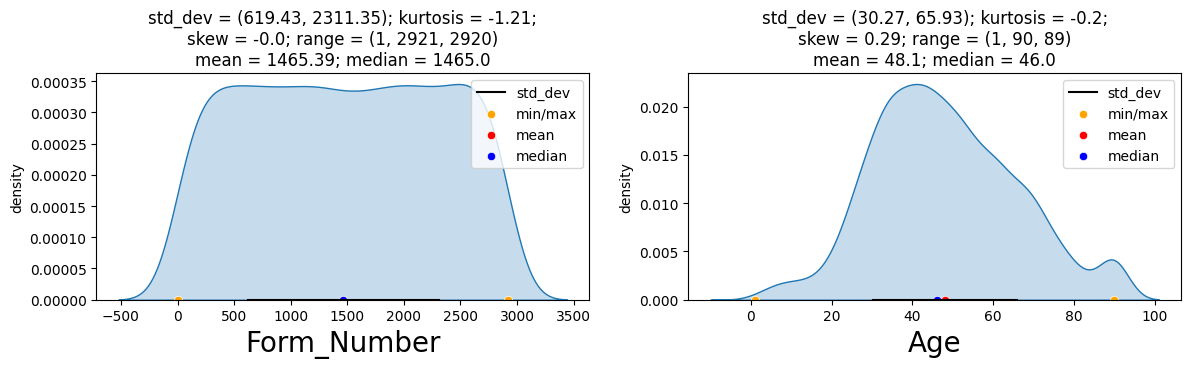

In [ ]:
UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **Form_number**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **Age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger Age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### INCOME

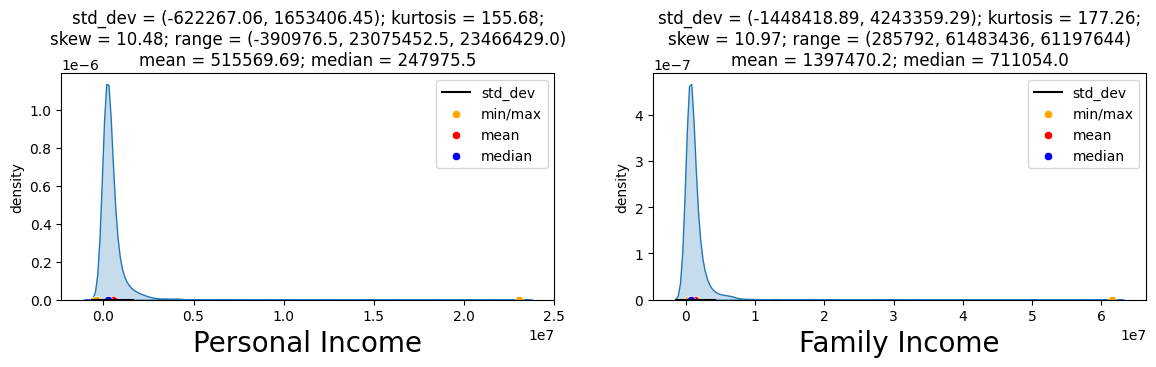

In [ ]:
UVA_numeric(data,income)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are obvious.


**Need to Remove Outliers to visualise these plots**

In [ ]:
# standard deviation factor
factor = 3

# copying income
income_data = data[income]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
income_data = income_data[income_data['Personal Income'] < factor*income_data['Personal Income'].std()]
income_data = income_data[income_data['Family Income'] < factor*income_data['Family Income'].std()]

# checking how many points removed
len(data), len(income_data)

(2741, 2622)

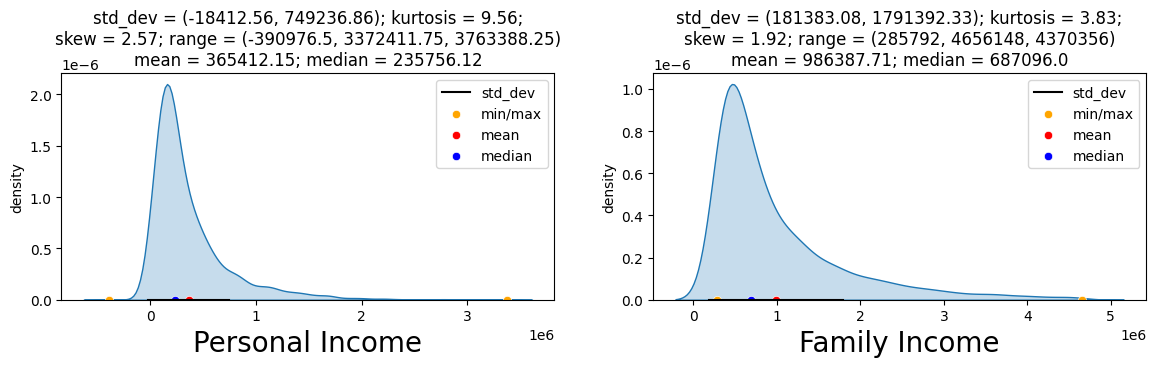

In [ ]:
UVA_numeric(income_data,income)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

### Transactions

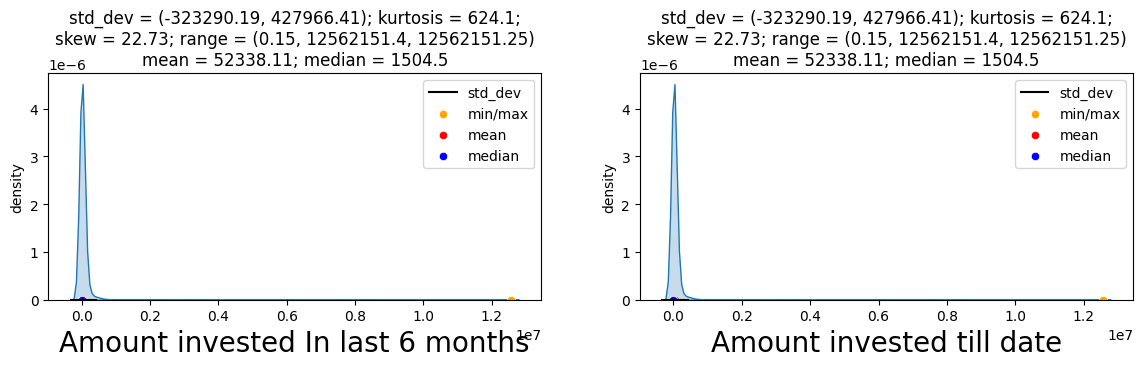

In [ ]:
UVA_numeric(data,transactions)

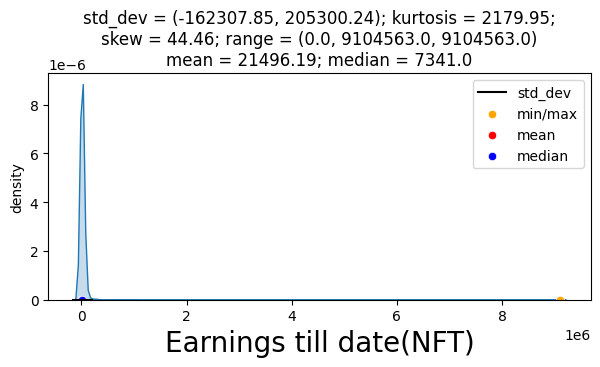

In [ ]:
UVA_numeric(data,earning)

**Summary**
The general trend still follows, it is crutial that we find the out if there is any common trait between the customers doing high high amount of transactions.

### transaction_date

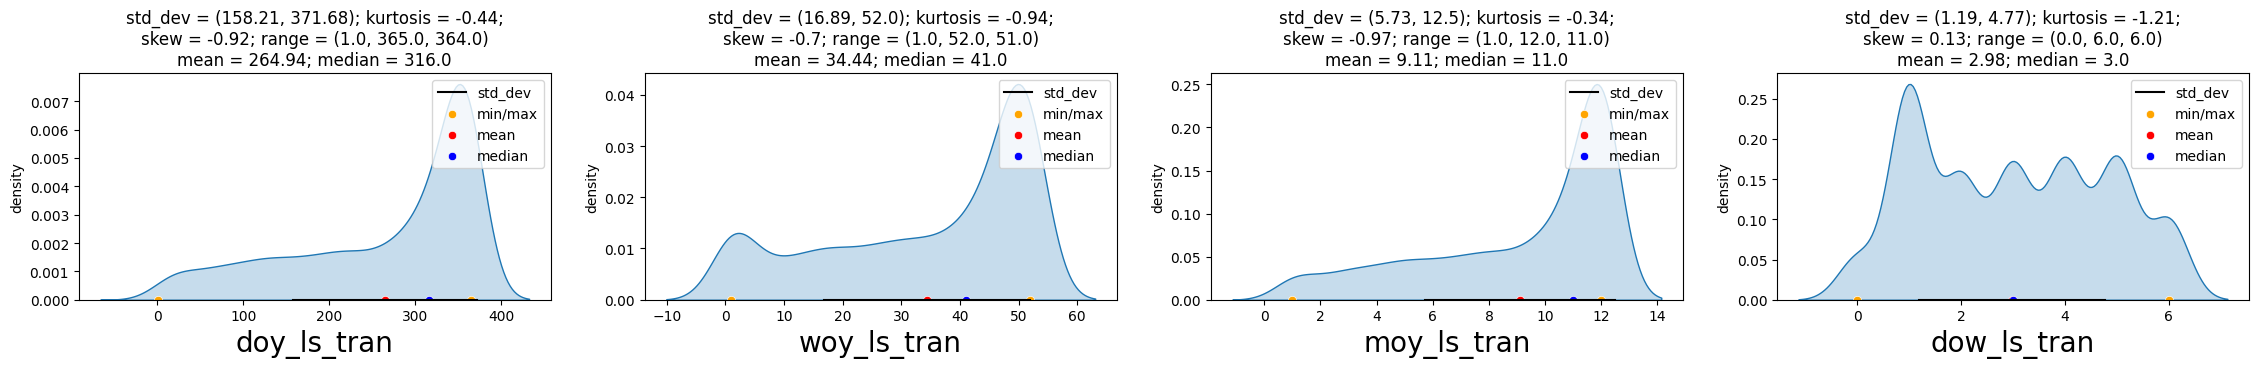

In [ ]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## Univariate Analysis : Categorical Varibales

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

Gender        category
Occupation    category
City          category
Retained      category
dtype: object

**Grouping Varibales**

* **customer_info**: gender, occupation
* **account_info**: city, branch_code
* **retention**

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### customer_info

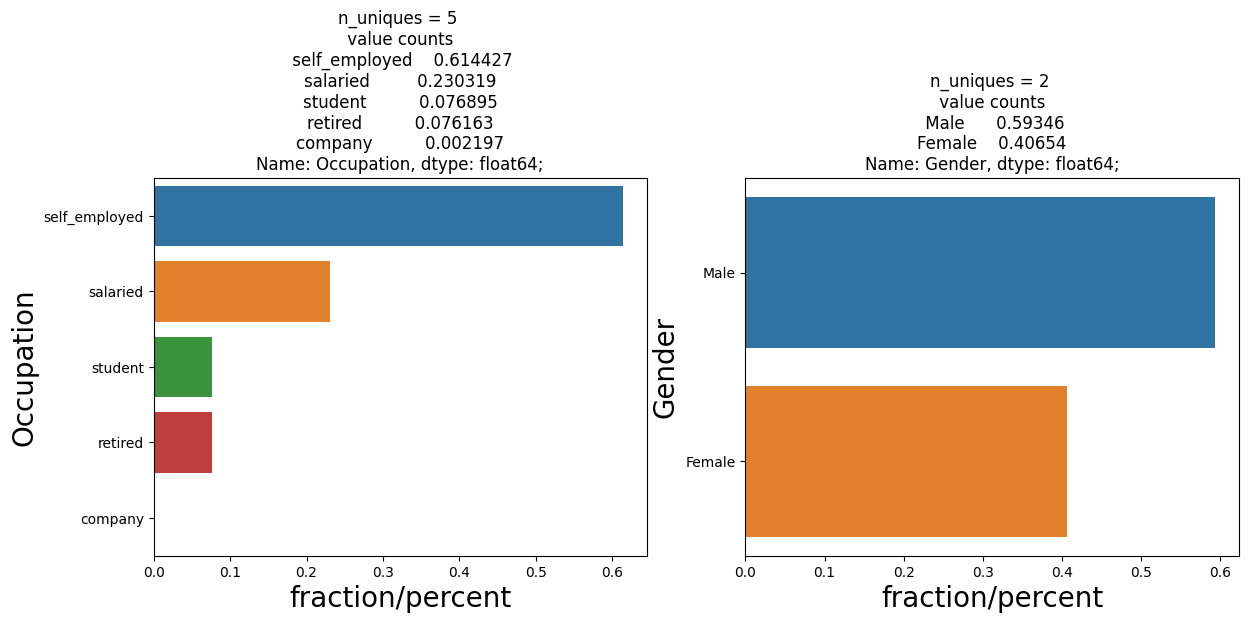

In [ ]:
UVA_category(data, ['Occupation', 'Gender'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### account_info

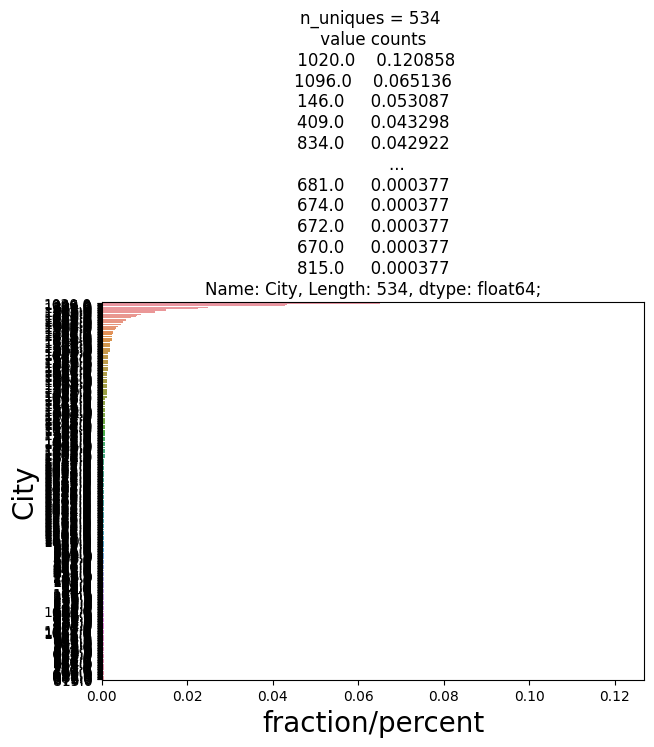

In [ ]:
UVA_category(data, ['City'])

(0.0, 0.02)

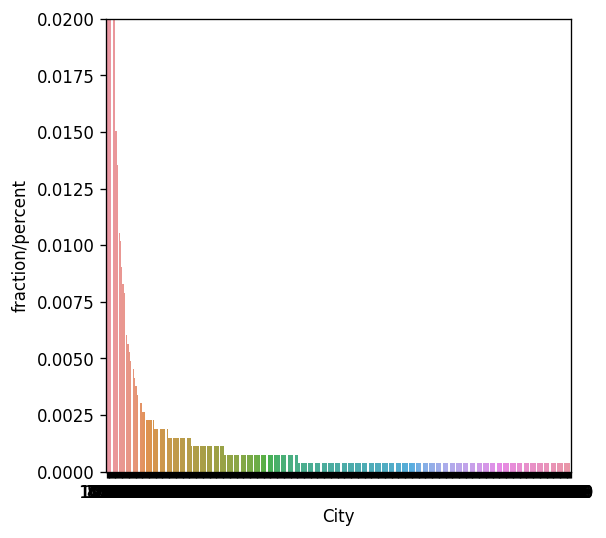

In [ ]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['City'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

**Summary:**
for variable "city" there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities with very few accounts may lead to customers that retain.

### churn

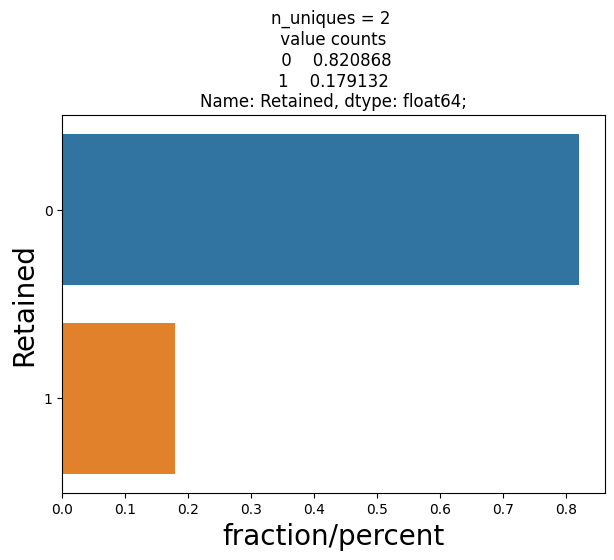

In [ ]:
UVA_category(data, ['Retained'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

## Univariate: Missing Values

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()

Form_Number                                             0
Age                                                     0
Gender                                                 50
No.of dependents                                      232
Occupation                                             10
City                                                   85
Education(1-ungraduate, 2-graduate,3-postgraduate)      0
Personal Income(in $)                                   0
Personal Income                                         0
Family Income(in $)                                     0
Family Income                                           0
Amount invested In last 6 months                        0
Amount invested till date(in $)                         0
Amount invested till date                               0
Earnings till date(NFT)                                 0
Retained                                                0
doy_ls_tran                                           297
woy_ls_tran   

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * retention: do missing values have any relation with retention?

* Dependents:
 * Missing values might be similar to zero dependents
 * retention: do missing values have any relation with retention?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with retention?

* last_transaction:
  * checking their previous month and current month activity might give insight on their last transaction.


## Univariate Analysis: Outliers

**We suspected outliers in personal income and family income variable groups. Verifies that using box plots**

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(round(IQR,2), 
                                                    round(med,2),(round(quant25,2),round(quant75,2)), (outlier_low,outlier_high)))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### Earnings and Transactions

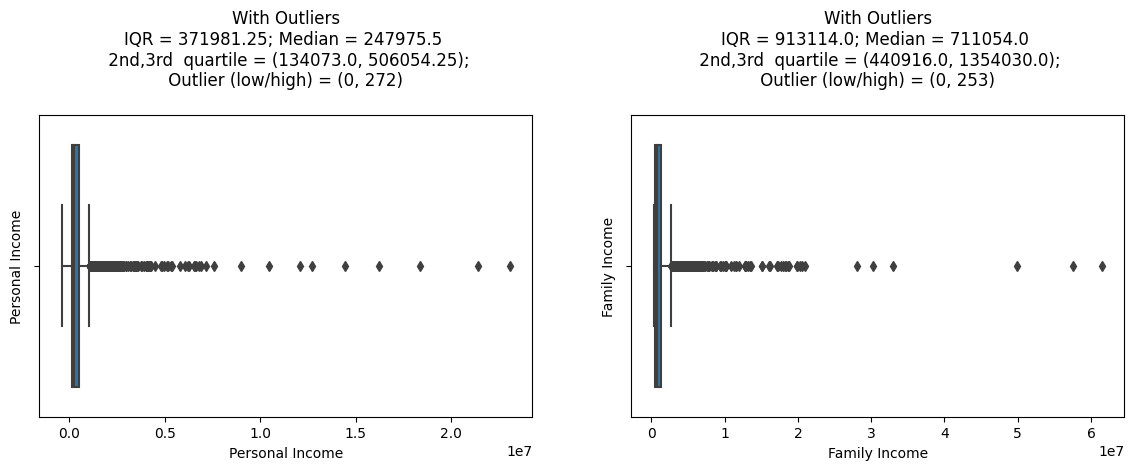

In [ ]:
UVA_outlier(data, income,)

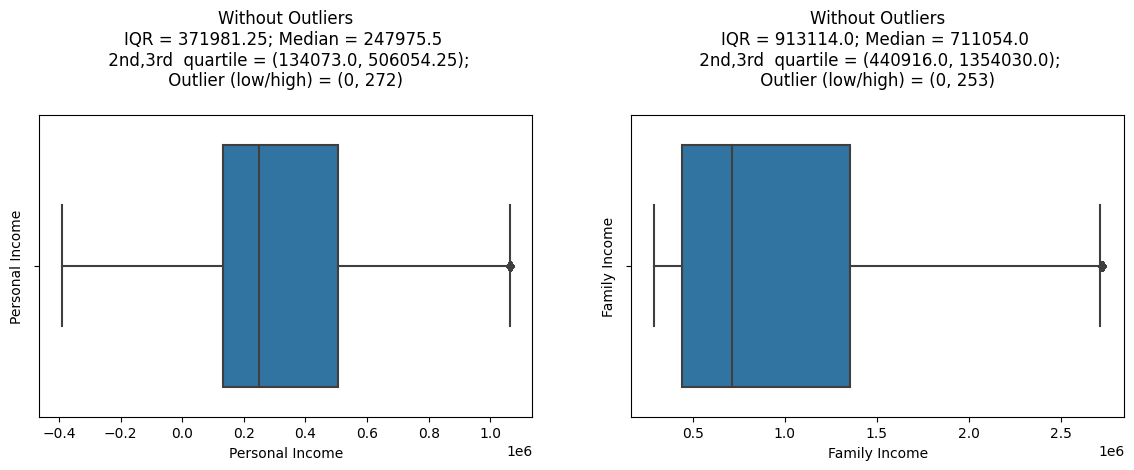

In [ ]:
UVA_outlier(data, income, include_outlier=False)

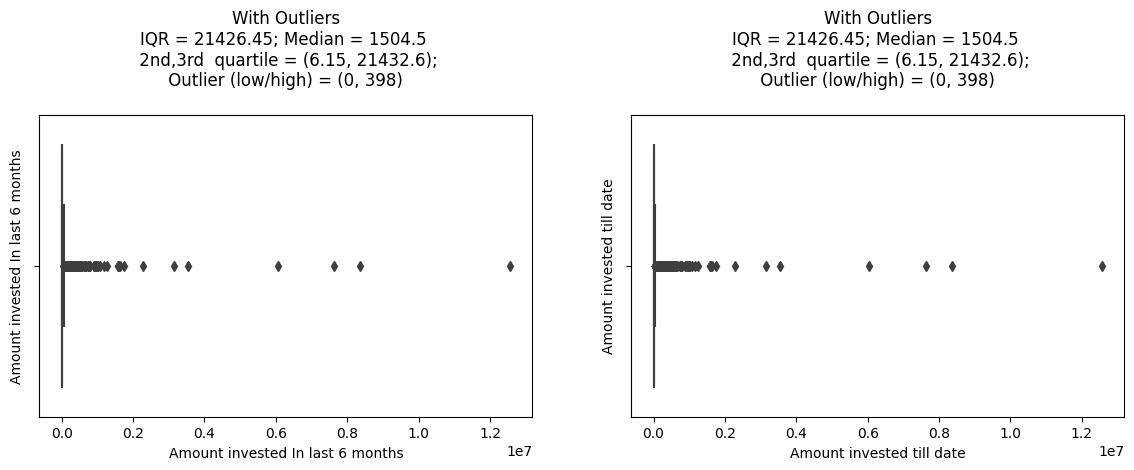

In [ ]:
UVA_outlier(data, transactions)

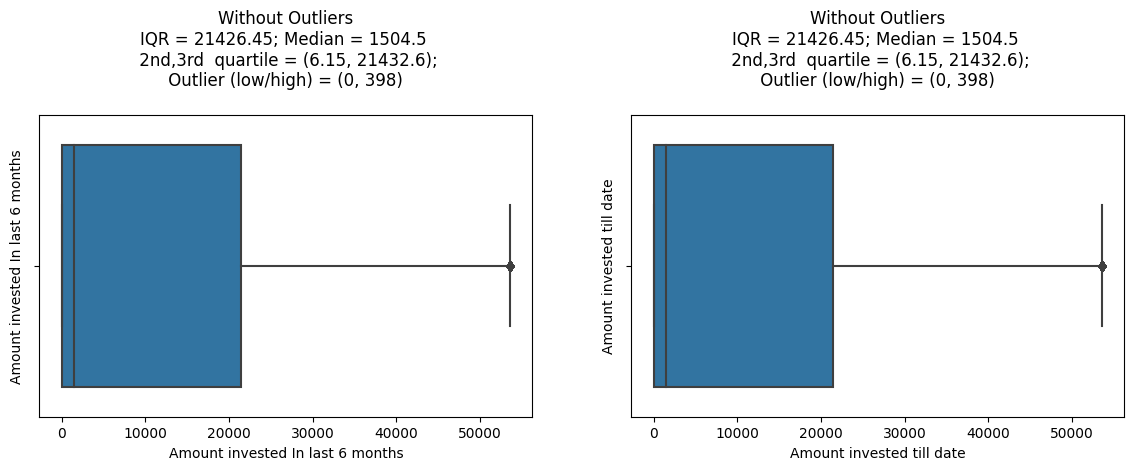

In [ ]:
UVA_outlier(data, transactions, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transactions
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them retain? 
5. Possibility that cities with very more accounts may lead to retention.


## Bivariate Analysis : Numerical-Numerical

In [ ]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Form_Number                                             int64
Age                                                     int64
No.of dependents                                        Int64
Education(1-ungraduate, 2-graduate,3-postgraduate)      int64
Personal Income(in $)                                 float64
Personal Income                                       float64
Family Income(in $)                                   float64
Family Income                                           int64
Amount invested In last 6 months                      float64
Amount invested till date(in $)                       float64
Amount invested till date                             float64
Earnings till date(NFT)                               float64
doy_ls_tran                                           float64
woy_ls_tran                                           float64
moy_ls_tran                                           float64
dow_ls_tran                                           float64
dtype: o

### Correlation Matrix

In [ ]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Form_Number,Age,No.of dependents,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,Amount invested till date(in $),Amount invested till date,Earnings till date(NFT),doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
Form_Number,1.000000,-0.000620,-0.029855,0.026708,0.006020,0.006020,0.007555,0.007555,0.040073,0.040073,0.040073,-0.061391,0.005857,-0.022476,0.003957,-0.003037
Age,-0.000620,1.000000,0.016621,-0.045925,0.119259,0.119259,0.122739,0.122739,0.055818,0.055818,0.055818,-0.020605,-0.030172,-0.017773,-0.029592,-0.027276
No.of dependents,-0.029855,0.016621,1.000000,0.020715,-0.020332,-0.020332,-0.014695,-0.014695,0.022597,0.022597,0.022597,0.038307,0.081486,0.000431,0.079014,-0.022460
"Education(1-ungraduate, 2-graduate,3-postgraduate)",0.026708,-0.045925,0.020715,1.000000,-0.150657,-0.150657,-0.163325,-0.163325,-0.080839,-0.080839,-0.080839,-0.024171,-0.040918,0.002127,-0.038981,-0.002915
Personal Income(in $),0.006020,0.119259,-0.020332,-0.150657,1.000000,1.000000,0.894199,0.894199,0.050729,0.050729,0.050729,0.058922,0.044329,0.001055,0.043911,-0.028855
Personal Income,0.006020,0.119259,-0.020332,-0.150657,1.000000,1.000000,0.894199,0.894199,0.050729,0.050729,0.050729,0.058922,0.044329,0.001055,0.043911,-0.028855
Family Income(in $),0.007555,0.122739,-0.014695,-0.163325,0.894199,0.894199,1.000000,1.000000,0.121750,0.121750,0.121750,0.081219,0.019052,-0.001372,0.019789,-0.022837
Family Income,0.007555,0.122739,-0.014695,-0.163325,0.894199,0.894199,1.000000,1.000000,0.121750,0.121750,0.121750,0.081219,0.019052,-0.001372,0.019789,-0.022837
Amount invested In last 6 months,0.040073,0.055818,0.022597,-0.080839,0.050729,0.050729,0.121750,0.121750,1.000000,1.000000,1.000000,0.034228,0.069810,0.028784,0.066596,0.033670
Amount invested till date(in $),0.040073,0.055818,0.022597,-0.080839,0.050729,0.050729,0.121750,0.121750,1.000000,1.000000,1.000000,0.034228,0.069810,0.028784,0.066596,0.033670


### Heatmap

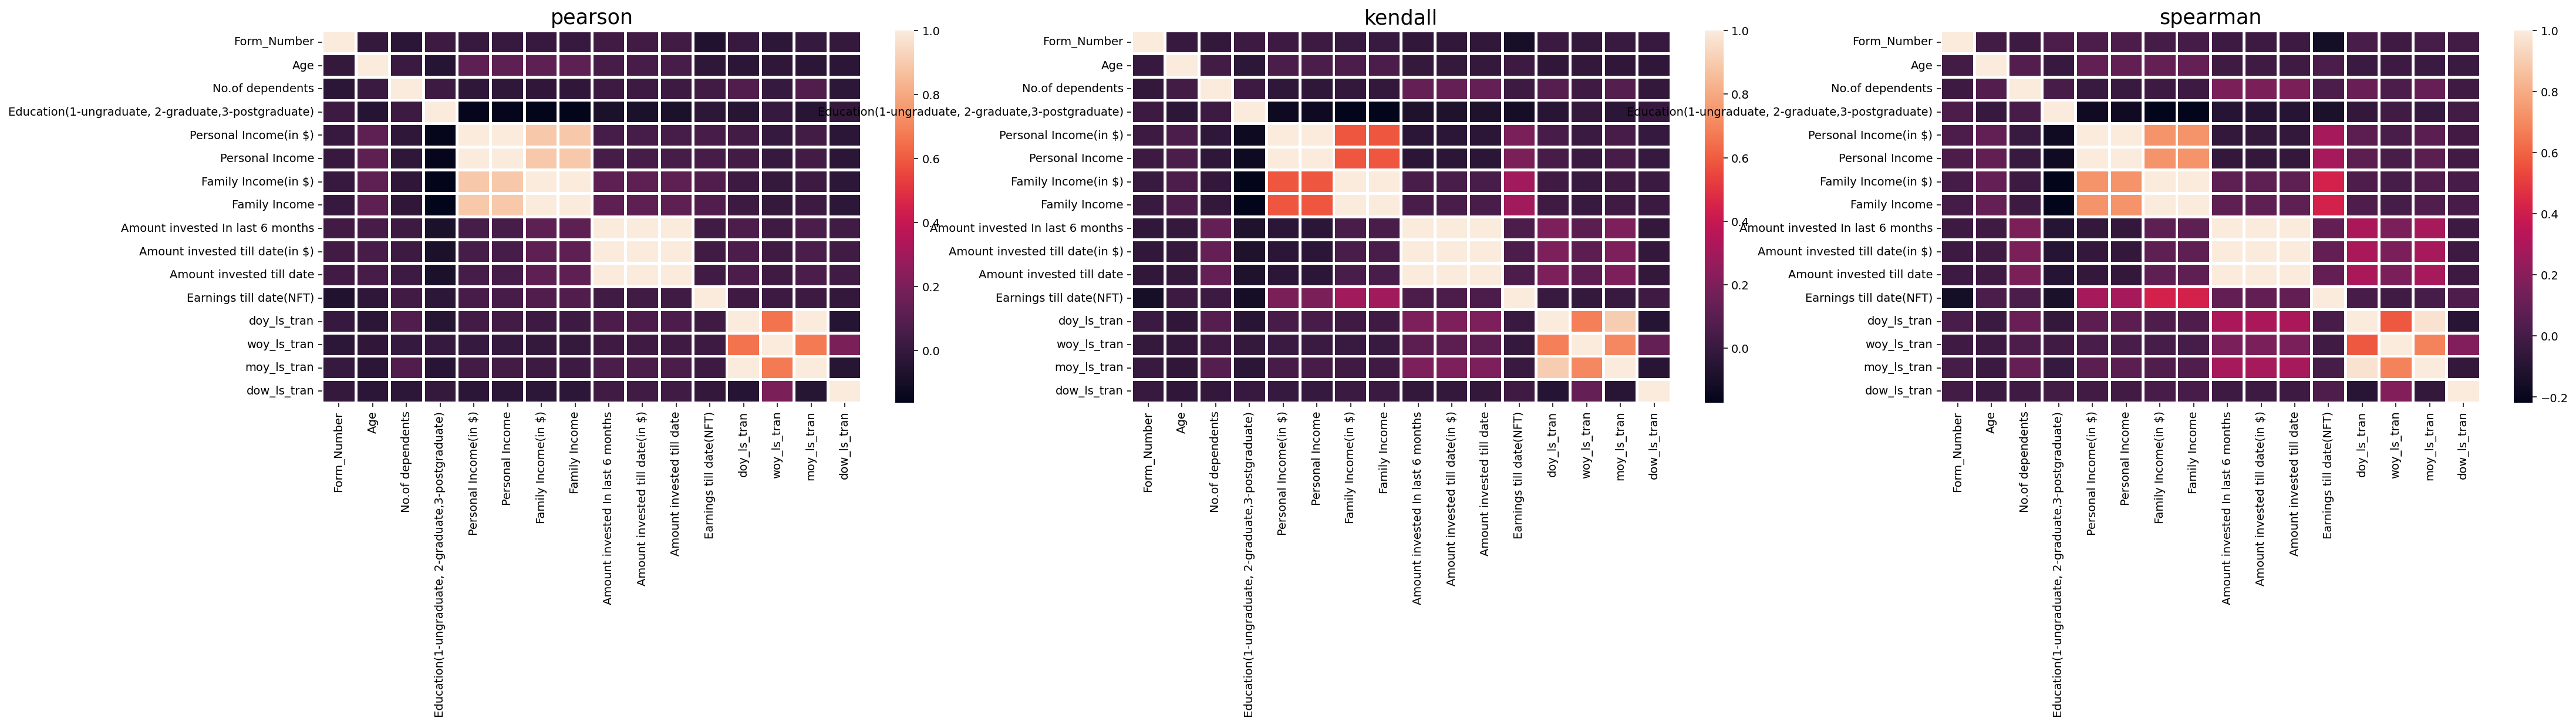

In [ ]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [ ]:
# extracting information of earning and income
var = []
var.extend(income)
var.extend(transactions)

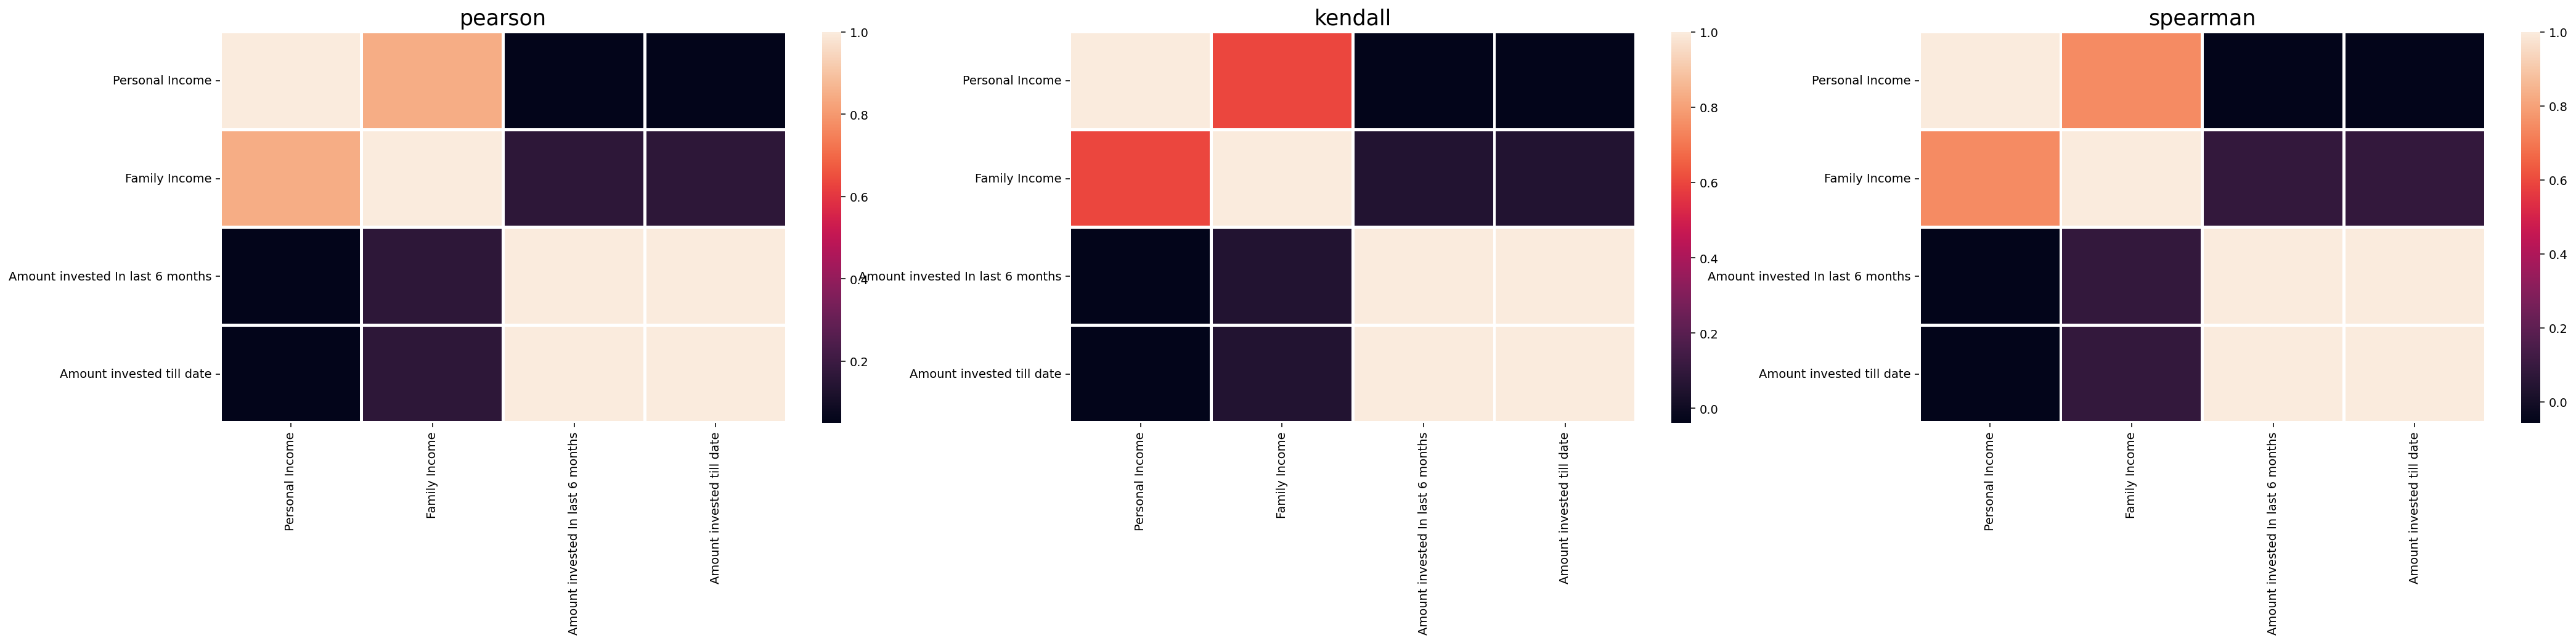

In [ ]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like transactions till now and transactions in last 6 months have a strong correlation among themselves.
2.  Balane variables have strong correlation among themselves.
3.   Transaction variables have insignificant or no correlation with the Balance variables.



### Scatterplot

In [ ]:
# Grouping variables
spending = ['Amount invested In last 6 months','Amount invested till date']
total_income = ['Family Income','Personal Income']
earning=['Earnings till date(NFT)']

<Figure size 840x560 with 0 Axes>

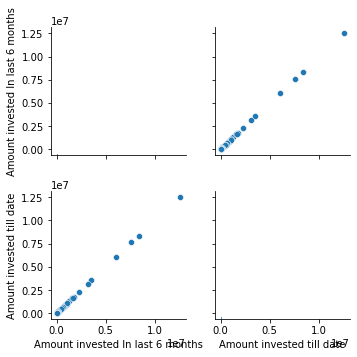

In [ ]:
# scatter plot for spending variables
plt.figure(dpi=140)
sns.pairplot(numerical[spending])

**the scatter plot is is not meaningful due to the presence of outliers**

In [ ]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

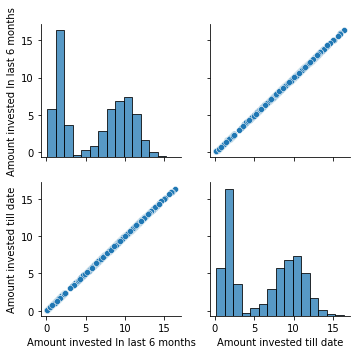

In [ ]:
# scatter plot for spending variables
plt.figure(dpi=140)
sns.pairplot(numerical[spending])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 840x560 with 0 Axes>

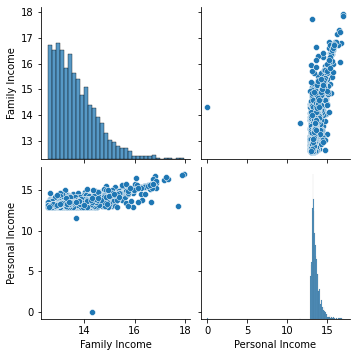

In [ ]:
# earning total_income
plt.figure(dpi=140)
sns.pairplot(numerical[total_income])

**Inferences**
1.    This validates the high correlation between the earning variables.
2.    This high correlation can be used for feature engineering during the later stages.

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

In [ ]:
## Multivariate Analysis

### Pivot Table

We are using Pivot table to comply with the objective of identifying the Retaininging Customers Profile using multiple categorical features.
Using Gender, Occupation category and derive insights from the Pivot Table

### Gender, Occupation, Customer Net worth category with Churn

In [ ]:
data['Gender'] = data['Gender'].astype('object')
data['Occupation'] = data['Occupation'].astype('object')
data['Retained'] = data['Retained'].astype('int')
data['City'] = data['City'].astype('float')


* Suitable datatype for Creating Pivot table in Pandas version (categorical datatype is not supported)

In [ ]:
data.pivot_table('Retained', ['Gender', 'Occupation'], aggfunc='mean')*100

Retained
Gender Occupation              
Female retired         2.439024
       salaried       12.500000
       self_employed  19.745223
       student        20.618557
Male   company         0.000000
       retired        16.167665
       salaried       15.434783
       self_employed  19.763314
       student        17.699115

* __Highest number of reatining customers__ are those __Male Customers__ who lie belong to __Self-employed__ profession
* For income category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are Retaining.
* For income category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are Retaining
* For income category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are retaining.
* In all the cases of income, __Self-employed Male customers__ are more likely to retain.


### Gender, Age, Occupation with Churning Status

Using one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who retain.
Hence, conversion of continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [ ]:
Age = pd.cut(data['Age'], [0, 25, 50, 100])
data.pivot_table('Retained', ['Gender', Age], 'Occupation', aggfunc='sum')

Occupation        company  retired  salaried  self_employed  student
Gender Age                                                          
Female (0, 25]          0        0         0              1       16
       (25, 50]         0        0        13             85        4
       (50, 100]        0        1         8             69        0
Male   (0, 25]          0        0         3              6       10
       (25, 50]         0        0        43             98       10
       (50, 100]        0       27        25             63        0

In [ ]:
age = pd.cut(data['Age'], [0, 25, 50, 100])
data.pivot_table('Retained', ['Gender', Age], 'Occupation', aggfunc='mean')*100

Occupation        company    retired   salaried  self_employed    student
Gender Age                                                               
Female (0, 25]        NaN        NaN   0.000000       9.090909  21.621622
       (25, 50]       NaN        NaN  11.111111      20.190024  17.391304
       (50, 100]      NaN   2.439024  16.666667      19.546742        NaN
Male   (0, 25]        NaN        NaN  30.000000      24.000000  11.235955
       (25, 50]       0.0   0.000000  14.052288      19.639279  41.666667
       (50, 100]      0.0  16.265060  17.361111      19.626168        NaN

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are retaining from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are retaining from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are retaining more than any other combination of categories



### Gender,Age,Occupation and Current Balance with Churning Status

Let's dig deeper by using two continuous variables Age and Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to retention customers profile

In [ ]:
income = pd.qcut(data['Personal Income'], 3)
data.pivot_table('Retained', ['Gender', Age], [income, 'Occupation'], aggfunc='sum')

Personal Income  (-390976.501, 165405.75]                                 \
Occupation                        company retired salaried self_employed   
Gender Age                                                                 
Female (0, 25]                          0       0        0             1   
       (25, 50]                         0       0        7            55   
       (50, 100]                        0       1        3            40   
Male   (0, 25]                          0       0        2             5   
       (25, 50]                         0       0       28            71   
       (50, 100]                        0      21       15            27   

Personal Income          (165405.75, 396478.25]                   \
Occupation       student                company retired salaried   
Gender Age                                                         
Female (0, 25]        12                      0       0        0   
       (25, 50]        3                      0       0        3   
       (50, 100]       0                      0       0        2   
Male   (0, 25]         8                      0       0        1   
       (25, 50]        6                      0       0        6   
       (50, 100]       0                      0       3        7   

Personal Income                        (396478.25, 23075452.5]          \
Occupation       self_employed student                 company retired   
Gender Age                                                               
Female (0, 25]               0       1                       0       0   
       (25, 50]             19       0                       0       0   
       (50, 100]            16       0                       0       0   
Male   (0, 25]               0       2                       0       0   
       (25, 50]             14       1                       0       0   
       (50, 100]            15       0                       0       3   

Personal Income                                  
Occupation       salaried self_employed student  
Gender Age                                       
Female (0, 25]          0             0       3  
       (25, 50]         3            11       1  
       (50, 100]        3            13       0  
Male   (0, 25]          0             1       0  
       (25, 50]         9            13       3  
       (50, 100]        3            21       0

In [ ]:
income = pd.qcut(data['Personal Income'], 3)
data.pivot_table('Retained', ['Gender', Age], [income, 'Occupation'], aggfunc='mean')*100

Personal Income  (-390976.501, 165405.75]                                      \
Occupation                        company    retired   salaried self_employed   
Gender Age                                                                      
Female (0, 25]                        NaN        NaN   0.000000     20.000000   
       (25, 50]                       NaN        NaN  18.918919     37.931034   
       (50, 100]                      NaN   8.333333  25.000000     34.188034   
Male   (0, 25]                        NaN        NaN  50.000000     55.555556   
       (25, 50]                       0.0        NaN  28.000000     38.797814   
       (50, 100]                      0.0  38.181818  31.914894     28.421053   

Personal Income             (165405.75, 396478.25]                     \
Occupation          student                company retired   salaried   
Gender Age                                                              
Female (0, 25]    41.379310                    NaN     NaN   0.000000   
       (25, 50]   33.333333                    NaN     NaN   6.818182   
       (50, 100]        NaN                    NaN     0.0  11.111111   
Male   (0, 25]    30.769231                    NaN     NaN  25.000000   
       (25, 50]   85.714286                    NaN     0.0   5.882353   
       (50, 100]        NaN                    0.0     5.0  14.893617   

Personal Income                           (396478.25, 23075452.5]            \
Occupation       self_employed    student                 company   retired   
Gender Age                                                                    
Female (0, 25]        0.000000   3.125000                     NaN       NaN   
       (25, 50]      11.875000   0.000000                     NaN       NaN   
       (50, 100]     16.666667        NaN                     NaN  0.000000   
Male   (0, 25]        0.000000   5.714286                     NaN       NaN   
       (25, 50]       8.750000  25.000000                     NaN       NaN   
       (50, 100]     16.304348        NaN                     0.0  5.882353   

Personal Income                                       
Occupation         salaried self_employed    student  
Gender Age                                            
Female (0, 25]     0.000000      0.000000  23.076923  
       (25, 50]    8.333333      9.482759  14.285714  
       (50, 100]  16.666667      9.285714        NaN  
Male   (0, 25]     0.000000     20.000000   0.000000  
       (25, 50]    8.653846      8.333333  23.076923  
       (50, 100]   6.000000     15.671642        NaN

* Balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are retaining.
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are retaining and for second and third quantile percentage of retaining customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their retaining proportion decreases. This means that __Young Self employed Customers__ are more likely to retain. 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are retaining more than young female self employed customers

### Box Plot

Now in order to comply with our objective of identifying churning customers profile we will use grouped Box plot.

In [ ]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



### Age, Occupation, Churn

We are using one continuous variable Age and one categorical variable Occupation to derive insights related to retaining customers profile

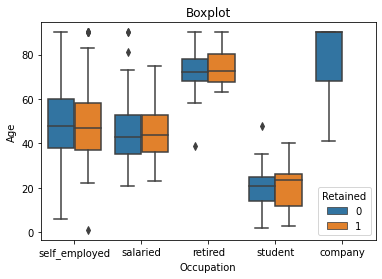

In [ ]:
Grouped_Box_Plot(data,'Age', 'Occupation', 'Retained')

We can notice here that 
* For __Self-employed__ profession retaining customers are slightly __younger__ than non retaining customers
* In the retired occupation for non retaining customers, there are many outliers that indicate __young people who retire early are not retaining__



### Vintage, Gender, Churn

It is also important to know the significance of vintage on retaining profile of customers gender wise
So let't take Vintage and Gender to derive insights for retaining customers

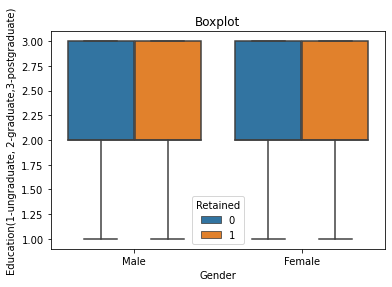

In [ ]:
Grouped_Box_Plot(data,'Education(1-ungraduate, 2-graduate,3-postgraduate)','Gender', 'Retained')

* There is __no visible difference__ in the vintage feature for genderwise retaining and non retaining customers



## Pair Plot

#### Churn vs Current & Previous month balances

Now, we will check the relationship of the some transactional variables along with the retaining status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [ ]:
income_cols = ['Personal Income','Family Income']
data1 = pd.DataFrame()

for i in income_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_income_cols = data1.columns

In [ ]:
data1['Retained'] = data['Retained']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here the following has been included:
* Log of family and personal income
* Retention is represented by the color here (Orange - Churn, Blue - Not Churn)

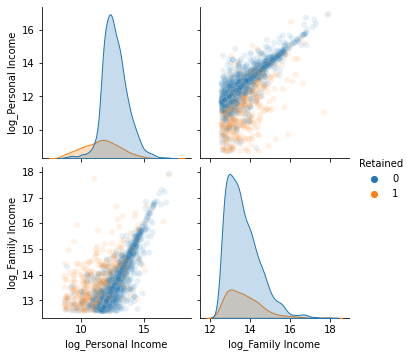

In [ ]:
sns.pairplot(data1,vars=log_income_cols,hue ='Retained',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for retention and not retention is slightly different for both the cases

### Total investment and investment in the last 6 months

Total investment till date and amount invested in the last 6 months can be clubbed into the same category. Now, using the pair plot to check distributions and scatter plots.

In [ ]:
invested_cols = ['Amount invested In last 6 months','Amount invested till date']
data1 = pd.DataFrame()

for i in invested_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_invested_cols = data1.columns

In [ ]:
data1['Retained'] = data['Retained']

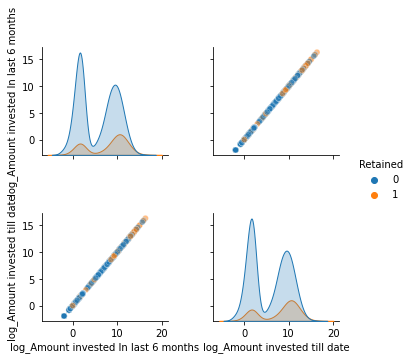

In [ ]:
sns.pairplot(data1,vars=log_invested_cols, hue = 'Retained',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of amount invested in different time frames. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for retention and non retention and it might turn out to be an important feature

## Encoding

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Form_Number,Age,No.of dependents,City,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,...,Retained,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,Gender_Male,Occupation_retired,Occupation_salaried,Occupation_self_employed,Occupation_student
0,1,66,0,187.0,2,1458.71,109403.25,1458.71,291742,3.00,...,0,141.0,21.0,5.0,1.0,1,0,0,1,0
1,2,35,0,NaN,2,5390.37,404277.75,7799.26,1559852,1508.40,...,0,11.0,2.0,1.0,4.0,1,0,0,1,0
2,4,31,0,146.0,2,3913.16,293487.00,4910.17,982034,3888.45,...,0,NaN,NaN,NaN,NaN,1,0,1,0,0
3,5,90,<NA>,1020.0,2,2291.91,171893.25,2084.54,416908,32149.95,...,1,159.0,23.0,6.0,5.0,0,0,0,1,0
4,6,42,2,1494.0,3,927.72,69579.00,1643.31,328662,23070.90,...,1,70.0,11.0,3.0,0.0,1,0,0,1,0


* Encoding the variables using get dummies pandas function so every variable has numerical value attached to it

## Missing Values with Mode

In [ ]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
fill_mode(data_encoded)

* Filling missing values with the mode of the data

### Segregating variables: Independent and Dependent Variables

In [ ]:
data_encoded = data_encoded.drop('Form_Number', axis=1)

* Insignification variable drop

In [ ]:
#seperating independent and dependent variables
x = data_encoded.drop(['Retained'], axis=1)
y = data_encoded['Retained']
x.shape, y.shape

((2741, 21), (2741,))

* Creating features and target variable

In [ ]:
data_encoded.columns

Index(['Age', 'No.of dependents', 'City',
       'Education(1-ungraduate, 2-graduate,3-postgraduate)',
       'Personal Income(in $)', 'Personal Income', 'Family Income(in $)',
       'Family Income', 'Amount invested In last 6 months',
       'Amount invested till date(in $)', 'Amount invested till date',
       'Earnings till date(NFT)', 'Retained', 'doy_ls_tran', 'woy_ls_tran',
       'moy_ls_tran', 'dow_ls_tran', 'Gender_Male', 'Occupation_retired',
       'Occupation_salaried', 'Occupation_self_employed',
       'Occupation_student'],
      dtype='object')

### Splitting the data into train set and the test set

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

* Splitting the entire data into train and test set

### Normalising using *min_max_scaler*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols = train_x.columns
cols

Index(['Age', 'No.of dependents', 'City',
       'Education(1-ungraduate, 2-graduate,3-postgraduate)',
       'Personal Income(in $)', 'Personal Income', 'Family Income(in $)',
       'Family Income', 'Amount invested In last 6 months',
       'Amount invested till date(in $)', 'Amount invested till date',
       'Earnings till date(NFT)', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran', 'Gender_Male', 'Occupation_retired',
       'Occupation_salaried', 'Occupation_self_employed',
       'Occupation_student'],
      dtype='object')

In [ ]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,No.of dependents,City,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,Amount invested till date(in $),...,Earnings till date(NFT),doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,Gender_Male,Occupation_retired,Occupation_salaried,Occupation_self_employed,Occupation_student
0,0.471264,0.0,0.202670,1.0,0.020107,0.020107,0.006649,0.006649,4.426368e-03,4.426368e-03,...,0.002508,0.947802,0.960784,1.000000,0.500000,0.0,0.0,0.0,1.0,0.0
1,0.931034,0.0,0.009102,0.5,0.022870,0.022870,0.012676,0.012676,7.044972e-07,7.044972e-07,...,0.000163,0.956044,0.960784,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0
2,0.586207,0.0,0.877427,0.5,0.024819,0.024819,0.008206,0.008206,5.970315e-08,5.970315e-08,...,0.000028,0.307692,0.313725,0.272727,0.166667,1.0,0.0,0.0,1.0,0.0
3,0.471264,0.0,0.378034,1.0,0.035378,0.035378,0.018966,0.018966,9.552504e-08,9.552504e-08,...,0.000438,0.423077,0.431373,0.454545,0.166667,1.0,0.0,1.0,0.0,0.0
4,0.563218,0.0,0.348908,0.5,0.058691,0.058691,0.003908,0.003908,5.134471e-07,5.134471e-07,...,0.000060,0.991758,1.000000,1.000000,0.833333,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,No.of dependents,City,"Education(1-ungraduate, 2-graduate,3-postgraduate)",Personal Income(in $),Personal Income,Family Income(in $),Family Income,Amount invested In last 6 months,Amount invested till date(in $),...,Earnings till date(NFT),doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,Gender_Male,Occupation_retired,Occupation_salaried,Occupation_self_employed,Occupation_student
0,0.344828,0.0,0.348908,1.0,0.018693,0.018693,0.001617,0.001617,6.651886e-04,6.651886e-04,...,0.000426,0.950549,0.960784,1.000000,0.666667,0.0,0.0,1.0,0.0,0.0
1,0.724138,0.0,0.608617,0.5,0.027981,0.027981,0.006008,0.006008,3.474365e-04,3.474365e-04,...,0.000020,0.442308,0.450980,0.454545,0.166667,1.0,1.0,0.0,0.0,0.0
2,0.758621,0.0,0.618932,0.5,0.042715,0.042715,0.023787,0.023787,8.238796e-04,8.238796e-04,...,0.000068,0.780220,0.784314,0.818182,0.833333,0.0,0.0,0.0,1.0,0.0
3,0.896552,0.0,0.789442,0.5,0.013688,0.013688,0.017009,0.017009,3.928479e-02,3.928479e-02,...,0.001503,0.865385,0.882353,0.909091,0.166667,1.0,1.0,0.0,0.0,0.0
4,-0.022989,0.0,0.506068,0.5,0.027465,0.027465,0.008457,0.008457,8.119628e-07,8.119628e-07,...,0.000614,0.442308,0.450980,0.454545,0.166667,0.0,0.0,0.0,1.0,0.0


* Scaling the data so model doesn't has bias for high valued features

## Model Building

**Support Vector Machine Modelling**

In [ ]:
from sklearn import preprocessing
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

**Preprocessing**

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(train_x,train_y)

SVC(kernel='linear')

SVM model is named as **“classifier“**.

Defining model: 

In [ ]:
X_train_prediction = classifier.predict(train_x)
training_data_accuracy = accuracy_score(X_train_prediction, train_y)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8374695863746958


Model is trained with train_x

In [ ]:
X_test_prediction = classifier.predict(test_x)
test_data_accuracy = accuracy_score(X_test_prediction, test_y)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.8279883381924198


**Logistic Regression Modelling**

In [ ]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )

Training accuracy_score 0.8467153284671532
Test accuracy_score     0.8250728862973761


**Decision Tree Modelling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=1)

In [ ]:
model.fit(train_x,train_y)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions = model.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       562
           1       0.29      0.48      0.36       124

    accuracy                           0.69       686
   macro avg       0.58      0.61      0.58       686
weighted avg       0.76      0.69      0.72       686



In [ ]:
print(accuracy_score(test_y, predictions))

0.6895043731778425


**Random Forest Modelling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [ ]:
rfmodel.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500)

In [ ]:
rfpredictions = rfmodel.predict(test_x)

In [ ]:
print(accuracy_score(test_y, rfpredictions))

0.8483965014577259


In [ ]:
print(classification_report(test_y, rfpredictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       562
           1       0.59      0.51      0.55       124

    accuracy                           0.85       686
   macro avg       0.74      0.72      0.73       686
weighted avg       0.84      0.85      0.84       686



* **Support Vector Machine** Algorithm works pretty well as compare to other algorithms and able to provide accuracy more than 80% for both training and test set.